<a href="https://colab.research.google.com/github/yadgire7/Machine-Learning/blob/master/Bootstrap_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Saurabh Arun Yadgire
USC ID: 8065527198
Github ID:yadgire7

Resources:
1. https://pynative.com/python-count-number-of-files-in-a-directory/
2. https://pypi.org/project/bootstrapped/
3. https://ocw.mit.edu/courses/18-05-introduction-to-probability-and-statistics-spring-2014/pages/readings/
4. https://sparkbyexamples.com/pandas/pandas-rename-column-by-index/#:~:text=If%20you%20wanted%20to%20rename,where%20you%20wanted%20to%20rename.

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
import scipy
from sklearn import svm
import os
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from sklearn.feature_selection import RFECV,f_regression,chi2,f_regression
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
import statsmodels.api as sm
import rpy2 as rp
import re

# Bootstrap implementation continued

In [ ]:
# using code from HW3
frames=[]
dir=r"../Data"
dir_list=os.listdir(dir)
# print(dir_list)
features_df=pd.DataFrame(columns=['mean1','std1','min1','1st Quart(1)','Median(1)','3rd Quart(1)','max1','mean2','std2','min2','1st Quart(2)','Median(2)','3rd Quart(2)','max2','mean3','std3','min3','1st Quart(3)','Median(3)','3rd Quart(3)','max3','mean4','std4','min4','1st Quart(4)','Median(4)','3rd Quart(4)','max4','mean5','std5','min5','1st Quart(5)','Median(5)','3rd Quart(5)','max5','mean6','std6','min6','1st Quart(6)','Median6','3rd Quart(6)','max6'])
def get_n_of_files(folder_name):
    counter = 0
    dir_path=r"../Data/"
    dir_path=dir_path+folder_name
    return len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])

def get_instance(dir_list):
    for folder in dir_list:
        n_files= get_n_of_files(folder)
        for i in range(1,n_files+1):
            tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
            if len(tempdf.index) !=480:
                tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
#             snippet to check dataset with missing value
#             added NaN
#             print(folder+"/dataset"+str(i))
#             print(tempdf.shape)
            ft_df = pd.DataFrame(tempdf.describe())
            ft_df = ft_df.iloc[1:,1:]
            ft_df =ft_df.T
            ft_arr=ft_df.to_numpy().flatten()
            features_df.loc[len(features_df)]=ft_arr
            tempdf.insert(0,'movement',folder)
            frames.append(tempdf)

get_instance(dir_list)
# print(len(frames))
df = pd.concat(frames)
df.reset_index(drop=True,inplace=True)
df.rename(columns={'# Columns: time':'time'})
print(features_df.shape)
# df.tail

(88, 42)


In [ ]:
test_frames=[]
train_frames=[]
train_features_df = pd.DataFrame(columns=['mean1','std1','min1','1st Quart(1)','Median(1)','3rd Quart(1)','max1','mean2','std2','min2','1st Quart(2)','Median(2)','3rd Quart(2)','max2','mean3','std3','min3','1st Quart(3)','Median(3)','3rd Quart(3)','max3','mean4','std4','min4','1st Quart(4)','Median(4)','3rd Quart(4)','max4','mean5','std5','min5','1st Quart(5)','Median(5)','3rd Quart(5)','max5','mean6','std6','min6','1st Quart(6)','Median6','3rd Quart(6)','max6','movement'])
test_features_df = pd.DataFrame(columns=['mean1','std1','min1','1st Quart(1)','Median(1)','3rd Quart(1)','max1','mean2','std2','min2','1st Quart(2)','Median(2)','3rd Quart(2)','max2','mean3','std3','min3','1st Quart(3)','Median(3)','3rd Quart(3)','max3','mean4','std4','min4','1st Quart(4)','Median(4)','3rd Quart(4)','max4','mean5','std5','min5','1st Quart(5)','Median(5)','3rd Quart(5)','max5','mean6','std6','min6','1st Quart(6)','Median6','3rd Quart(6)','max6','movement'])

for folder in ['bending1', 'bending2']:
    for i in range(1,3):
            tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
            if len(tempdf.index) !=480:
                tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
            ft_df = pd.DataFrame(tempdf.describe())
            ft_df = ft_df.iloc[1:,1:]
            ft_df =ft_df.T
            ft_arr=ft_df.to_numpy().flatten()
            ft_arr=list(ft_arr)
            ft_arr.append(str(folder))
            test_features_df.loc[len(test_features_df)]=ft_arr

            tempdf.insert(0,'movement',folder)

            test_frames.append(tempdf)
for folder in ['cycling', 'lying', 'sitting', 'standing', 'walking']:
    for i in range(1,4):
            tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
            if len(tempdf.index) !=480:
                tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
            ft_df = pd.DataFrame(tempdf.describe())
            ft_df = ft_df.iloc[1:,1:]
            ft_df =ft_df.T
            ft_arr=ft_df.to_numpy().flatten()
            ft_arr=list(ft_arr)
            ft_arr.append(str(folder))
            test_features_df.loc[len(test_features_df)]=ft_arr
            tempdf.insert(0,'movement',folder)

            test_frames.append(tempdf)

# **********************************************

for folder in ['bending1', 'bending2']:
    n_files= get_n_of_files(folder)
    for i in range(3,n_files+1):
        tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
        if len(tempdf.index) !=480:
            tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
        ft_df = pd.DataFrame(tempdf.describe())
        ft_df = ft_df.iloc[1:,1:]
        ft_df =ft_df.T
        ft_arr=ft_df.to_numpy().flatten()
        ft_arr=list(ft_arr)
        ft_arr.append(str(folder))
        train_features_df.loc[len(train_features_df)]=ft_arr
        tempdf.insert(0,'movement',folder)

        train_frames.append(tempdf)

for folder in ['cycling', 'lying', 'sitting', 'standing', 'walking']:
    n_files= get_n_of_files(folder)
    for i in range(4,n_files+1):
        tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
        if len(tempdf.index) !=480:
                tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
        ft_df = pd.DataFrame(tempdf.describe())
        ft_df = ft_df.iloc[1:,1:]
        ft_df =ft_df.T
        ft_arr=ft_df.to_numpy().flatten()
        ft_arr=list(ft_arr)
        ft_arr.append(str(folder))
        train_features_df.loc[len(train_features_df)]=ft_arr
        tempdf.insert(0,'movement',folder)

        train_frames.append(tempdf)
train_df =pd.concat(train_frames)
test_df = pd.concat(test_frames)
train_df.reset_index(drop=True,inplace=True)
train_df.rename(columns={'# Columns: time':'time'})
test_df.reset_index(drop=True,inplace=True)
test_df.rename(columns={'# Columns: time':'time'})


,movement,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,bending1,0,39.25,0.43,22.75,0.43,33.75,1.30
1,bending1,250,39.25,0.43,23.00,0.00,33.00,0.00
2,bending1,500,39.25,0.43,23.25,0.43,33.00,0.00
3,bending1,750,39.50,0.50,23.00,0.71,33.00,0.00
4,bending1,1000,39.50,0.50,24.00,0.00,33.00,0.00
...,...,...,...,...,...,...,...,...
9115,walking,118750,36.00,2.45,17.00,5.10,20.50,0.87
9116,walking,119000,34.33,1.89,15.00,2.45,17.00,2.12
9117,walking,119250,33.00,7.35,14.60,3.14,13.00,5.70
9118,walking,119500,31.67,1.25,11.00,6.16,19.25,2.17


In [ ]:
# print(train_features_df.shape)
# print(test_features_df.shape)

In [ ]:
# print(test_df.movement.unique())

In [ ]:
instance_arr= np.arange(1,89,1)
features_df.insert(0,'Instance',instance_arr)
print(features_df.shape)

(88, 43)


In [ ]:
std_arr = pd.DataFrame(features_df.iloc[:,1:].std())
boot_arr=[]
n_boot=500
for i in range(1,len(features_df.columns)):
    boot_arr.append(bs.bootstrap(features_df.iloc[:,i].to_numpy(),stat_func=bs_stats.std))
# print(std_arr)
# print(boot_arr)
std_arr.insert(1,'bootstrap_values',boot_arr)
print(std_arr)

                     0                                   bootstrap_values
mean1         5.334976  5.304576712339364    (4.665851088195683, 6.048...
std1          1.760085  1.7500563039648553    (1.5377762085131574, 1.9...
min1          9.955581  9.898853739650244    (8.365606440282328, 11.57...
1st Quart(1)  6.153590  6.118526249454473    (5.518771766277667, 6.801...
Median(1)     5.440054  5.409056425357996    (4.741392034832218, 6.169...
3rd Quart(1)  5.138925  5.109642753365407    (4.270738517445836, 6.036...
max1          4.394362  4.36932238296287    (3.326854823396424, 5.6221...
mean2         1.574170  1.565199957842158    (1.4093165947505901, 1.78...
std2          0.884104  0.8790661169601129    (0.8119224803673416, 0.9...
min2          0.000000                                  0.0    (0.0, 0.0)
1st Quart(2)  0.946386  0.9409936333203218    (0.8366088057118766, 1.0...
Median(2)     1.412244  1.4041971241720508    (1.2527984208607856, 1.6...
3rd Quart(2)  2.125266  2.113156527737

In [ ]:
print('Q.4.a.i\n')
class_df4 = train_features_df
movement_class=[]
# print(class_df4.movement.unique())
for m in class_df4['movement']:
#     print(m)
    pattern=re.match("(^b\w+)",m)
    if pattern:
        movement_class.append(1)
    else:
#         print(0)
        movement_class.append(0)
class_df4.insert((class_df4.columns.size),'movement_class',movement_class)


Q.4.a.i



In [ ]:
print(train_features_df.shape)
print(test_features_df.shape)

(69, 44)
(19, 43)


# Pairwise interaction between bootstrapped variables

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


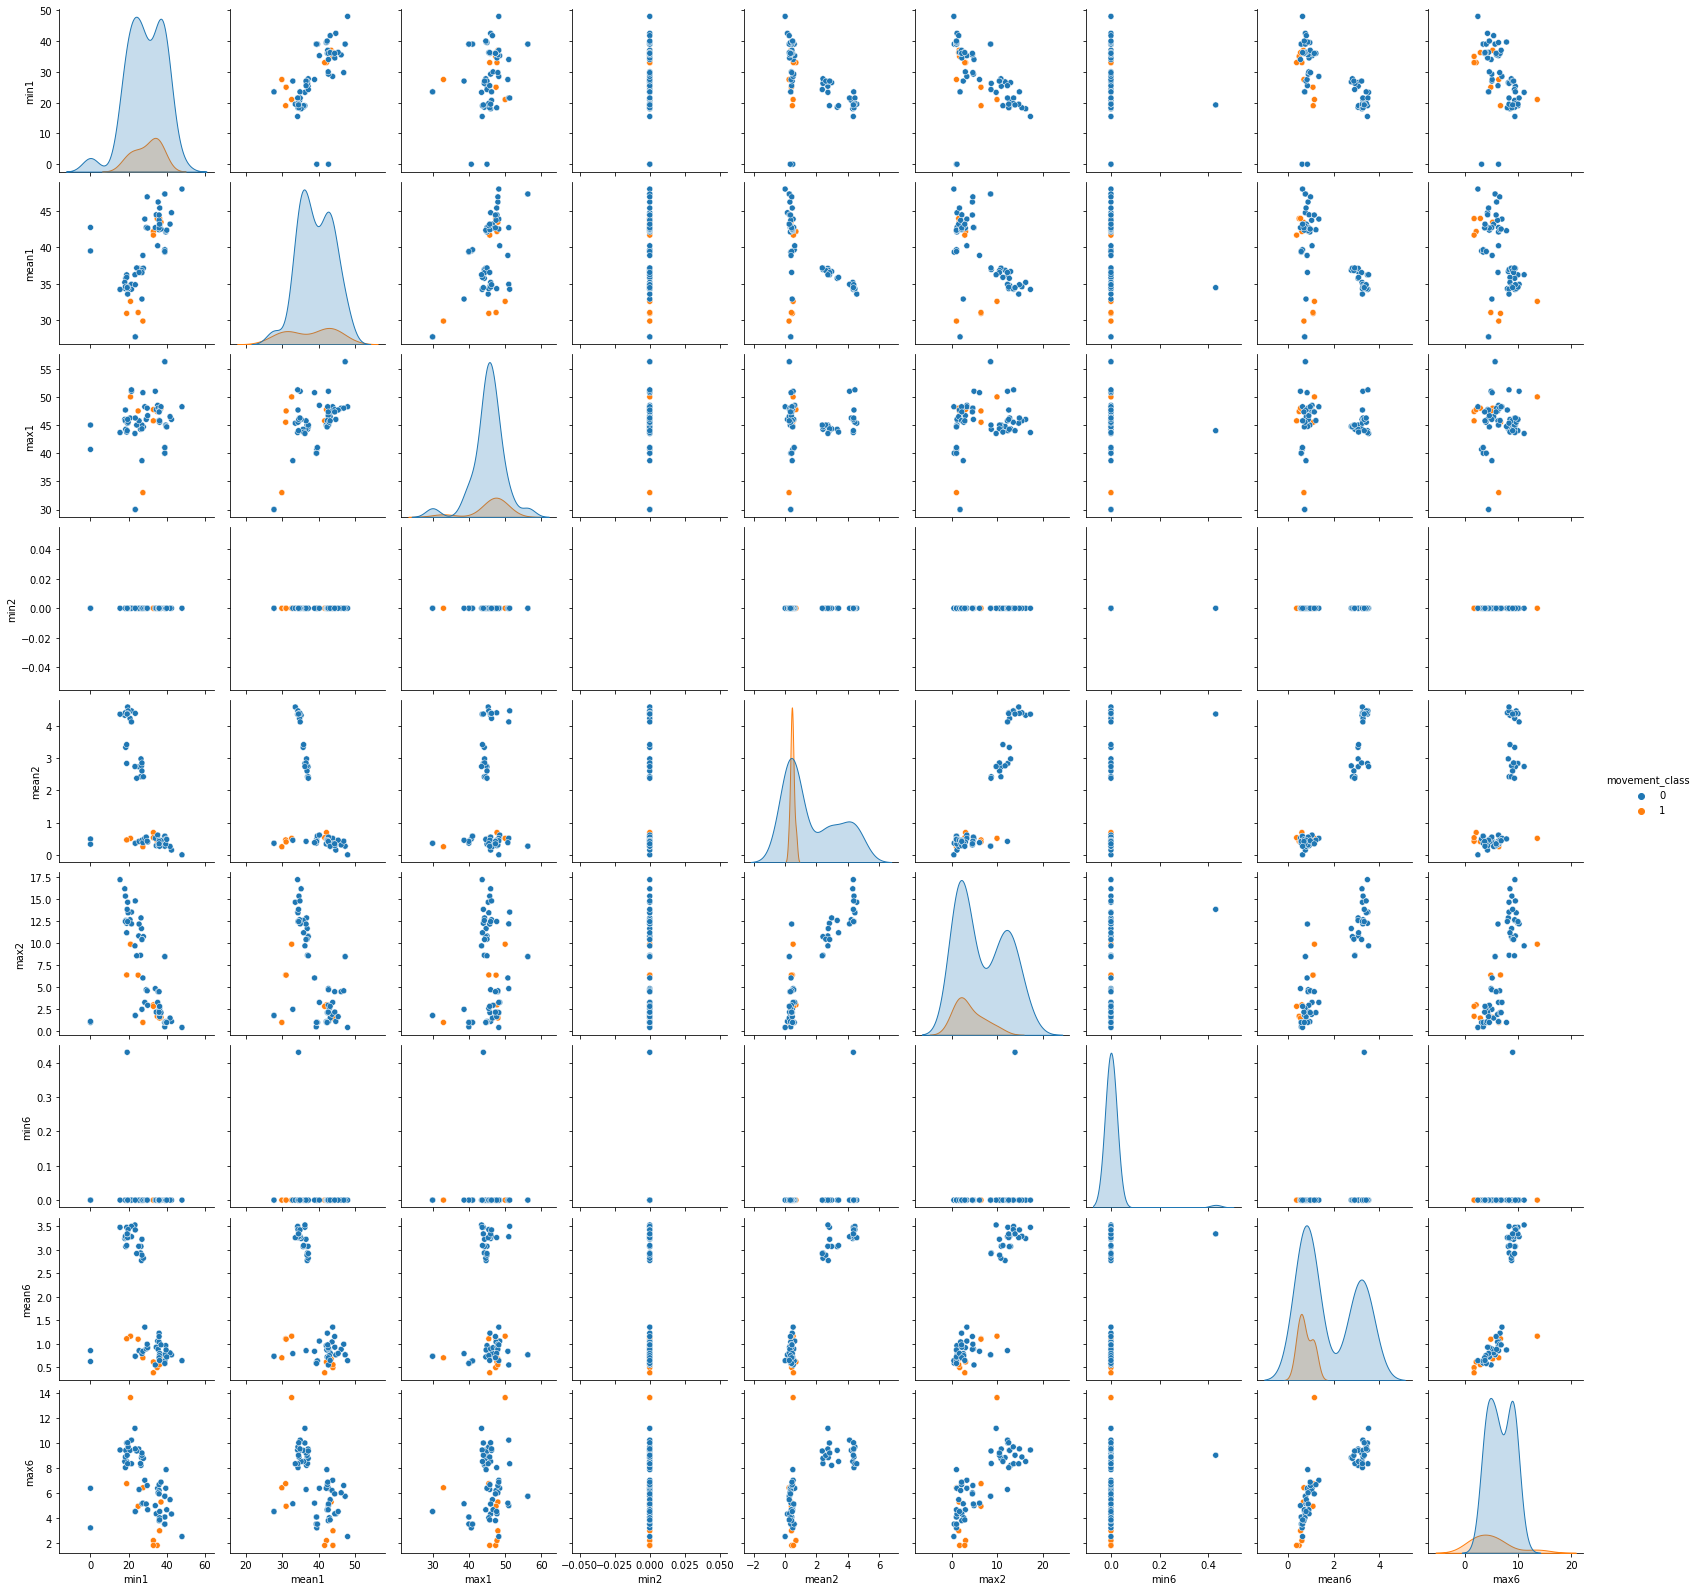

In [ ]:
plot_df =pd.DataFrame()
plot_df.insert(0,'min1',class_df4['min1'])
plot_df.insert(1,'mean1',class_df4['mean1'])
plot_df.insert(2,'max1',class_df4['max1'])
plot_df.insert(3,'min2',class_df4['min2'])
plot_df.insert(4,'mean2',class_df4['mean2'])
plot_df.insert(5,'max2',class_df4['max2'])
plot_df.insert(6,'min6',class_df4['min6'])
plot_df.insert(7,'mean6',class_df4['mean6'])
plot_df.insert(8,'max6',class_df4['max6'])
plot_df.insert(9,'movement_class',class_df4['movement_class'])

sbn.pairplot(plot_df,hue="movement_class",diag_kind="kde")

In [ ]:
train_features_df

,mean1,std1,min1,1st Quart(1),Median(1),3rd Quart(1),max1,mean2,std2,min2,...,max5,mean6,std6,min6,1st Quart(6),Median6,3rd Quart(6),max6,movement,movement_class
0,43.954500,1.558835,35.00,43.00,44.33,45.0000,47.40,0.426250,0.338690,0.0,...,38.50,0.493292,0.513506,0.00,0.0000,0.43,0.9400,1.79,bending1,1
1,42.179813,3.670666,33.00,39.15,43.50,45.0000,47.75,0.696042,0.630860,0.0,...,38.67,0.613521,0.524317,0.00,0.0000,0.50,1.0000,2.18,bending1,1
2,41.678063,2.243490,33.00,41.33,41.75,42.7500,45.75,0.535979,0.405469,0.0,...,37.50,0.383292,0.389164,0.00,0.0000,0.43,0.5000,1.79,bending1,1
3,43.454958,1.386098,37.00,42.50,43.25,45.0000,48.00,0.378083,0.315566,0.0,...,33.50,0.679646,0.622534,0.00,0.4300,0.50,0.8700,5.26,bending1,1
4,43.969125,1.618364,36.25,43.31,44.50,44.6700,48.00,0.413125,0.263111,0.0,...,30.75,0.555313,0.487826,0.00,0.0000,0.49,0.8300,2.96,bending1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,33.586875,4.650935,19.50,30.25,34.25,37.0000,45.33,4.576562,2.461077,0.0,...,25.00,3.259729,1.640243,0.00,2.0500,3.11,4.3225,8.32,walking,0
65,34.322750,4.752477,19.75,31.00,35.25,38.0000,45.50,4.456333,2.599284,0.0,...,23.25,3.432562,1.732727,0.00,2.1575,3.20,4.5650,9.67,walking,0
66,34.546229,4.842294,19.50,31.25,35.25,37.8125,46.00,4.371958,2.360448,0.0,...,22.75,3.338125,1.656742,0.00,2.1600,3.08,4.3350,10.00,walking,0
67,34.873229,4.531720,23.50,31.75,35.25,38.2500,46.25,4.380583,2.435437,0.0,...,23.50,3.424646,1.690960,0.00,2.1700,3.27,4.5000,9.51,walking,0


# Data Processing

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


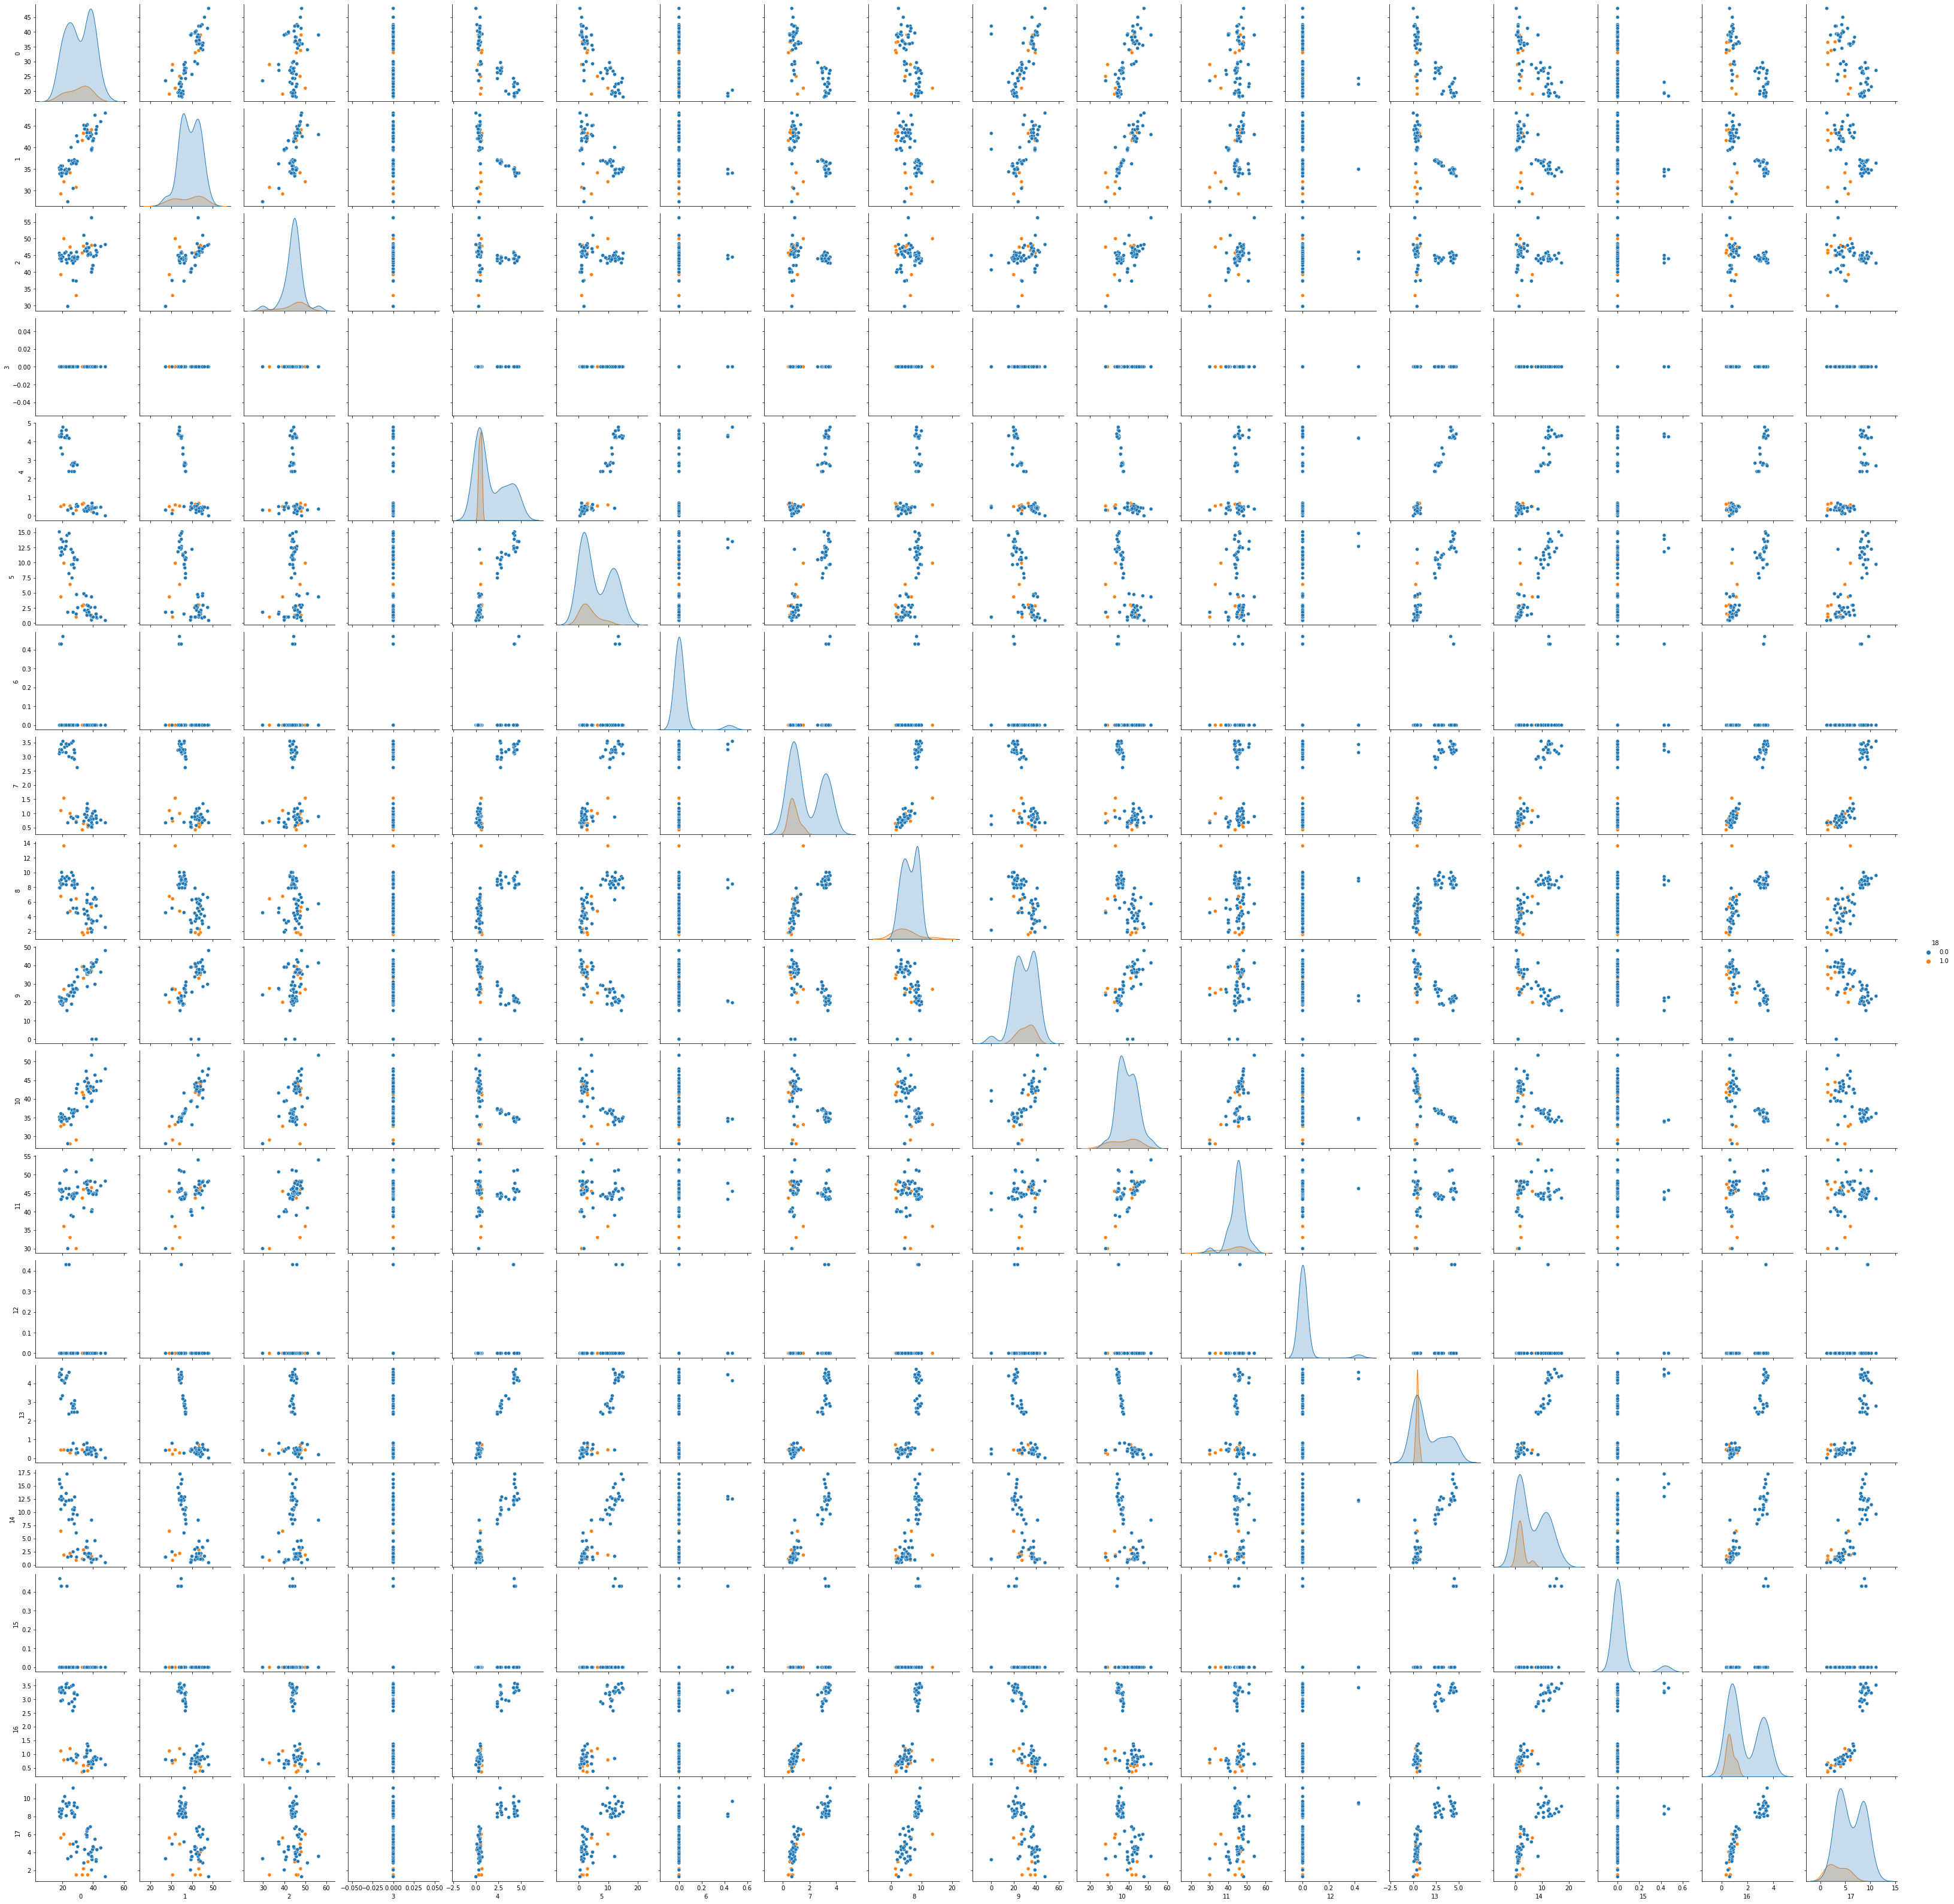

In [ ]:
def insert_ones(df):
    ones=np.ones(df.shape[0],dtype=int)
    df.insert(len(df.columns),'movement_class',ones)
def insert_zeros(df):
    zeros=np.zeros(df.shape[0],dtype=int)
    df.insert(len(df.columns),'movement_class',zeros)
final_df=pd.DataFrame(columns=[i for i in range(0,19)])
def split_into_p_parts(folders):

    counter = 0
    for folder in folders:
        n_files= get_n_of_files(folder)
#         print(n_files)
        if folder in ['bending1', 'bending2']:
            for i in range(3,n_files+1):
                tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
                if len(tempdf.index) !=480:
                    tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
                tempdf.drop('# Columns: time',axis=1,inplace=True)
                for p in range(2,3):
                    chunk_size = int(tempdf.shape[0] / p)
                    p_frames=[]
                    p_frames_final=pd.DataFrame()

                    for start in range(0, tempdf.shape[0], chunk_size):
                        p_frames_df=pd.DataFrame(columns=['min1','mean1','max1','min2','mean2','max2','min3','mean3','max3'])
                        df_subset = tempdf.iloc[start:start + chunk_size]
                        df_subset.reset_index(drop=True,inplace=True)
                        ft_arr=[]
                        for column in ['avg_rss12', 'var_rss12','var_rss23']:
                            ft1=df_subset[column].min()
                            ft2=df_subset[column].mean()
                            ft3= df_subset[column].max()
                            ft_arr.append(ft1)
                            ft_arr.append(ft2)
                            ft_arr.append(ft3)
        #                 print(len(ft_arr))
                        ft_arr=np.array(ft_arr)
                        ft_arr=ft_arr.flatten()
        #                     print(len(ft_arr))
                        if len(p_frames_df)==0:
                            p_frames_df.loc[0]=ft_arr
                        else:
                            p_frames_df.loc[len(p_frames_df)]=ft_arr
                        counter += 1
        #                 print(counter)
                        p_frames.append(p_frames_df)
#                     print(len(p_frames))
                    p_frames_final=pd.concat(p_frames,axis=1,ignore_index=True)
                    if folder in(['bending1', 'bending2']):
                        insert_ones(p_frames_final)
                    else:
                        insert_zeros(p_frames_final)
#                     print(len(p_frames_final))
                    n=p_frames_final.to_numpy().flatten()
#                     print(len(n))
                    if len(final_df)==0:
                        final_df.loc[0]=n
                    else:
                        final_df.loc[len(final_df)]=n
        else:
            for i in range(4,n_files+1):
                tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
                if len(tempdf.index) !=480:
                    tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
                tempdf.drop('# Columns: time',axis=1,inplace=True)
                for p in range(2,3):
                    chunk_size = int(tempdf.shape[0] / p)
                    p_frames=[]
                    p_frames_final=pd.DataFrame()

                    for start in range(0, tempdf.shape[0], chunk_size):
                        p_frames_df=pd.DataFrame(columns=['min1','mean1','max1','min2','mean2','max2','min3','mean3','max3'])
                        df_subset = tempdf.iloc[start:start + chunk_size]
                        df_subset.reset_index(drop=True,inplace=True)
                        ft_arr=[]
                        for column in ['avg_rss12', 'var_rss12','var_rss23']:
                            ft1=df_subset[column].min()
                            ft2=df_subset[column].mean()
                            ft3= df_subset[column].max()
                            ft_arr.append(ft1)
                            ft_arr.append(ft2)
                            ft_arr.append(ft3)
        #                 print(len(ft_arr))
                        ft_arr=np.array(ft_arr)
                        ft_arr=ft_arr.flatten()
        #                     print(len(ft_arr))
                        if len(p_frames_df)==0:
                            p_frames_df.loc[0]=ft_arr
                        else:
                            p_frames_df.loc[len(p_frames_df)]=ft_arr
                        counter += 1
        #                 print(counter)
                        p_frames.append(p_frames_df)
#                     print(len(p_frames))
                    p_frames_final=pd.concat(p_frames,axis=1,ignore_index=True)
                    if folder in(['bending1', 'bending2']):
                        insert_ones(p_frames_final)
                    else:
                        insert_zeros(p_frames_final)
#                     print(len(p_frames_final))
                    n=p_frames_final.to_numpy().flatten()
#                     print(len(n))
                    if len(final_df)==0:
                        final_df.loc[0]=n
                    else:
                        final_df.loc[len(final_df)]=n


    sbn.pairplot(final_df,hue=final_df.columns.values[18],diag_kind="kde")
split_into_p_parts(['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing', 'walking'])

In [ ]:
def insert_ones(df):
    ones=np.ones(df.shape[0],dtype=int)
    df.insert(len(df.columns),'movement_class',ones)
def insert_zeros(df):
    zeros=np.zeros(df.shape[0],dtype=int)
    df.insert(len(df.columns),'movement_class',zeros)
final_df=pd.DataFrame(columns=[i for i in range(0,19)])
def split_into_p_parts(folders):

    counter = 0
    for folder in folders:
        n_files= get_n_of_files(folder)
#         print(n_files)
        if folder in ['bending1', 'bending2']:
            for i in range(3,n_files+1):
                tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
                if len(tempdf.index) !=480:
                    tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
                tempdf.drop('# Columns: time',axis=1,inplace=True)
                for p in range(2,3):
                    chunk_size = int(tempdf.shape[0] / p)
                    p_frames=[]
                    p_frames_final=pd.DataFrame()

                    for start in range(0, tempdf.shape[0], chunk_size):
                        p_frames_df=pd.DataFrame(columns=['min1','mean1','max1','min2','mean2','max2','min3','mean3','max3'])
                        df_subset = tempdf.iloc[start:start + chunk_size]
                        df_subset.reset_index(drop=True,inplace=True)
                        ft_arr=[]
                        for column in ['avg_rss12', 'var_rss12','var_rss23']:
                            ft1=df_subset[column].min()
                            ft2=df_subset[column].mean()
                            ft3= df_subset[column].max()
                            ft_arr.append(ft1)
                            ft_arr.append(ft2)
                            ft_arr.append(ft3)
        #                 print(len(ft_arr))
                        ft_arr=np.array(ft_arr)
                        ft_arr=ft_arr.flatten()
        #                     print(len(ft_arr))
                        if len(p_frames_df)==0:
                            p_frames_df.loc[0]=ft_arr
                        else:
                            p_frames_df.loc[len(p_frames_df)]=ft_arr
                        counter += 1
        #                 print(counter)
                        p_frames.append(p_frames_df)
#                     print(len(p_frames))
                    p_frames_final=pd.concat(p_frames,axis=1,ignore_index=True)
                    if folder in(['bending1', 'bending2']):
                        insert_ones(p_frames_final)
                    else:
                        insert_zeros(p_frames_final)
#                     print(len(p_frames_final))
                    n=p_frames_final.to_numpy().flatten()
#                     print(len(n))
                    if len(final_df)==0:
                        final_df.loc[0]=n
                    else:
                        final_df.loc[len(final_df)]=n
        else:
            for i in range(4,n_files+1):
                tempdf = pd.read_csv(r"../Data/"+folder+"/dataset"+str(i)+".csv")
                if len(tempdf.index) !=480:
                    tempdf.loc[len(tempdf.index)]=[0,0,0,0,0,0,0]
                tempdf.drop('# Columns: time',axis=1,inplace=True)
                for p in range(2,3):
                    chunk_size = int(tempdf.shape[0] / p)
                    p_frames=[]
                    p_frames_final=pd.DataFrame()

                    for start in range(0, tempdf.shape[0], chunk_size):
                        p_frames_df=pd.DataFrame(columns=['min1','mean1','max1','min2','mean2','max2','min3','mean3','max3'])
                        df_subset = tempdf.iloc[start:start + chunk_size]
                        df_subset.reset_index(drop=True,inplace=True)
                        ft_arr=[]
                        for column in ['avg_rss12', 'var_rss12','var_rss23']:
                            ft1=df_subset[column].min()
                            ft2=df_subset[column].mean()
                            ft3= df_subset[column].max()
                            ft_arr.append(ft1)
                            ft_arr.append(ft2)
                            ft_arr.append(ft3)
        #                 print(len(ft_arr))
                        ft_arr=np.array(ft_arr)
                        ft_arr=ft_arr.flatten()
        #                     print(len(ft_arr))
                        if len(p_frames_df)==0:
                            p_frames_df.loc[0]=ft_arr
                        else:
                            p_frames_df.loc[len(p_frames_df)]=ft_arr
                        counter += 1
        #                 print(counter)
                        p_frames.append(p_frames_df)
#                     print(len(p_frames))
                    p_frames_final=pd.concat(p_frames,axis=1,ignore_index=True)
                    if folder in(['bending1', 'bending2']):
                        insert_ones(p_frames_final)
                    else:
                        insert_zeros(p_frames_final)
#                     print(len(p_frames_final))
                    n=p_frames_final.to_numpy().flatten()
#                     print(len(n))
                    if len(final_df)==0:
                        final_df.loc[0]=n
                    else:
                        final_df.loc[len(final_df)]=n


    sbn.pairplot(final_df,hue=final_df.columns.values[18],diag_kind="kde")
split_into_p_parts(['bending1', 'bending2','cycling', 'lying', 'sitting', 'standing', 'walking'])